## Readme

Aşağıda verilen notebook da öncelikle ML bazlı timeseries prediction için gerekli olan feature uzayını üretiyoruz. 

Bunun için `indb_ts.py` isimli bir helper yazdık lütfen inceleyiniz.

Featureları ürettikten sonra klasik makine öğrenmesi mantığında olduğu gibi tahmin edilecek bir geleceği test kümesi olarak ayırıyoruz ve öncesini training verisi olarak kullanıyoruz. Modeli öncelikli olarak XGBRegressor kullarak eğitik ancak sonrasında göreceğiniz üzere verticapy içinde bulunan automl kullarak bir leaderboard çalışması da yapacağız.

In [1]:
from indb_ts import ts_feature_sql
from verticapy.utilities import drop


/Users/husnusensoy/mconda3/envs/vertica-ml/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
print(
    ts_feature_sql(
        "bike_trip_daily",
        ts="starttime_dt",
        target="n",
        schema="nyc",
        by=["start_station_name"],
        ar_range=(31, 65),
    )
)


SELECT start_station_name,
       starttime_dt as ts,
       n as y_true,
       year(starttime_dt) as y,
       month(starttime_dt) as m,
       day(starttime_dt) as dow,
       dayofyear(starttime_dt) as doy,
       week(starttime_dt) as w,
       quarter(starttime_dt) as q,
       lag(n, 31) OVER(PARTITION BY start_station_name
                       ORDER BY starttime_dt) as lag_31,
       lag(n, 32) OVER(PARTITION BY start_station_name
                       ORDER BY starttime_dt) as lag_32,
       lag(n, 33) OVER(PARTITION BY start_station_name
                       ORDER BY starttime_dt) as lag_33,
       lag(n, 34) OVER(PARTITION BY start_station_name
                       ORDER BY starttime_dt) as lag_34,
       lag(n, 35) OVER(PARTITION BY start_station_name
                       ORDER BY starttime_dt) as lag_35,
       lag(n, 36) OVER(PARTITION BY start_station_name
                       ORDER BY starttime_dt) as lag_36,
       lag(n, 37) OVER(PARTITION BY start_station_

In [4]:
import verticapy as vp
from verticapy import vDataFrame

# Creating a new connection
vp.new_connection(
    {
        "host": "172.12.2.10",
        "port": "5433",
        "database": "vsunny",
        "password": "xxx",
        "user": "dbadmin",
    },
    name="MyVerticaConnection",
)

# Connecting to the Database
vp.connect("MyVerticaConnection")
vp.create_verticapy_schema()


In [5]:
drop(name="nyc.bike_trip_by_statition_daily_features")


False

In [7]:
X = vDataFrame(
    sql=ts_feature_sql(
        "trip_count_by_station",
        ts="starttime_dt",
        target="n",
        schema="nyc",
        by=["start_station_name"],
        ar_range=(31, 65),
    )
)


start_station_name            ts    y_true       y   \\
1         1 Ave & E 78 St    2015-09-10         5    2015   \\
2         1 Ave & E 78 St    2015-09-11        59    2015   \\
3         1 Ave & E 78 St    2015-09-12        76    2015   \\
4         1 Ave & E 78 St    2015-09-13       110    2015   \\
5         1 Ave & E 78 St    2015-09-14        94    2015   \\
6         1 Ave & E 78 St    2015-09-15       102    2015   \\
7         1 Ave & E 78 St    2015-09-16       108    2015   \\
8         1 Ave & E 78 St    2015-09-17       110    2015   \\
9         1 Ave & E 78 St    2015-09-18       120    2015   \\
10        1 Ave & E 78 St    2015-09-19       139    2015   \\
11        1 Ave & E 78 St    2015-09-20       133    2015   \\
12        1 Ave & E 78 St    2015-09-21        96    2015   \\
13        1 Ave & E 78 St    2015-09-22       110    2015   \\
14        1 Ave & E 78 St    2015-09-23       106    2015   \\
15        1 Ave & E 78 St    2015-09-24       129    2015   \\
16        1 Ave & E 78 St    2015-09-25       152    2015   \\
17        1 Ave & E 78 St    2015-09-26       180    2015   \\
18        1 Ave & E 78 St    2015-09-27       123    2015   \\
19        1 Ave & E 78 St    2015-09-28       118    2015   \\
20        1 Ave & E 78 St    2015-09-29       115    2015   \\
21        1 Ave & E 78 St    2015-09-30        81    2015   \\
22        1 Ave & E 78 St    2015-10-01        97    2015   \\
23        1 Ave & E 78 St    2015-10-02        25    2015   \\
24        1 Ave & E 78 St    2015-10-03        72    2015   \\
25        1 Ave & E 78 St    2015-10-04       109    2015   \\
26        1 Ave & E 78 St    2015-10-05       120    2015   \\
27        1 Ave & E 78 St    2015-10-06       136    2015   \\
28        1 Ave & E 78 St    2015-10-07       131    2015   \\
29        1 Ave & E 78 St    2015-10-08       128    2015   \\
30        1 Ave & E 78 St    2015-10-09       110    2015   \\
31        1 Ave & E 78 St    2015-10-10       136    2015   \\
32        1 Ave & E 78 St    2015-10-11       127    2015   \\
33        1 Ave & E 78 St    2015-10-12       120    2015   \\
34        1 Ave & E 78 St    2015-10-13       121    2015   \\
35        1 Ave & E 78 St    2015-10-14       137    2015   \\
36        1 Ave & E 78 St    2015-10-15       123    2015   \\
37        1 Ave & E 78 St    2015-10-16       125    2015   \\
38        1 Ave & E 78 St    2015-10-17       116    2015   \\
39        1 Ave & E 78 St    2015-10-18       108    2015   \\
40        1 Ave & E 78 St    2015-10-19       112    2015   \\
41        1 Ave & E 78 St    2015-10-20       115    2015   \\
42        1 Ave & E 78 St    2015-10-21       126    2015   \\
43        1 Ave & E 78 St    2015-10-22       135    2015   \\
44        1 Ave & E 78 St    2015-10-23       124    2015   \\
45        1 Ave & E 78 St    2015-10-24       106    2015   \\
46        1 Ave & E 78 St    2015-10-25       102    2015   \\
47        1 Ave & E 78 St    2015-10-26       109    2015   \\
48        1 Ave & E 78 St    2015-10-27       123    2015   \\
49        1 Ave & E 78 St    2015-10-28        76    2015   \\
50        1 Ave & E 78 St    2015-10-29       116    2015   \\
51        1 Ave & E 78 St    2015-10-30       122    2015   \\
52        1 Ave & E 78 St    2015-10-31       114    2015   \\
53        1 Ave & E 78 St    2015-11-01         1    2015   \\
54        1 Ave & E 78 St    2015-11-02       107    2015   \\
55        1 Ave & E 78 St    2015-11-03       117    2015   \\
56        1 Ave & E 78 St    2015-11-04       137    2015   \\
57        1 Ave & E 78 St    2015-11-05       105    2015   \\
58        1 Ave & E 78 St    2015-11-06       124    2015   \\
59        1 Ave & E 78 St    2015-11-07       117    2015   \\
60        1 Ave & E 78 St    2015-11-08       124    2015   \\
61        1 Ave & E 78 St    2015-11-09       103    2015   \\
62        1 Ave & E 78 St    2015-11-10        74    2015   \\
63        1 Ave & E 78 St    2015-11-1
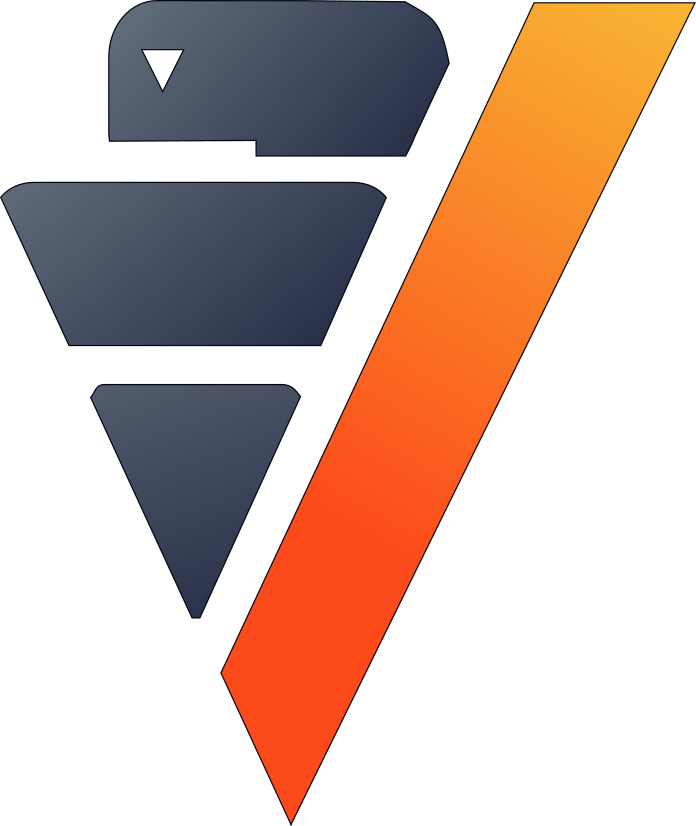

In [9]:
X.to_db(inplace=True, name="nyc.bike_trip_daily_by_station_features")


In [10]:
test = X.search("ts >= '2016-12-01'::date")
train = X.search("ts < '2016-12-01'::date")


In [11]:
len(test)


18404

In [12]:
len(train)


478871

In [13]:
from verticapy.learn.ensemble import XGBoostRegressor


In [14]:
xgb = XGBoostRegressor("nyc.xr_by_statition")


In [15]:
xgb.fit(train, train.get_columns(["ts", "starttime_dt", "n", "y_true"]), y="y_true")




call_string
xgb_regressor('nyc.xr_by_statition', '"nyc"."_verticapy_tmp_view_dbadmin_4917347_6674811035_"', '"y_true"', '"start_station_name", "y", "m", "dow", "doy", "w", "q", "lag_31", "lag_32", "lag_33", "lag_34", "lag_35", "lag_36", "lag_37", "lag_38", "lag_39", "lag_40", "lag_41", "lag_42", "lag_43", "lag_44", "lag_45", "lag_46", "lag_47", "lag_48", "lag_49", "lag_50", "lag_51", "lag_52", "lag_53", "lag_54", "lag_55", "lag_56", "lag_57", "lag_58", "lag_59", "lag_60", "lag_61", "lag_62", "lag_63", "lag_64", "mean31_65", "min31_65", "max31_65"' USING PARAMETERS exclude_columns='', max_ntree=10, max_depth=5, learning_rate=0.1, min_split_loss=0, weight_reg=0, nbins=32, objective=squarederror, sampling_size=1, col_sample_by_tree=1, col_sample_by_node=1)

details
    predictor     |      type      
------------------+----------------
start_station_name|char or varchar 
        y         |      int       
        m         |      int       
       dow        |      int       
       do

start_station_name            ts    y_true       y   \\
1         1 Ave & E 78 St    2016-12-01        87    2016   \\
2         1 Ave & E 78 St    2016-12-02       111    2016   \\
3         1 Ave & E 78 St    2016-12-03        95    2016   \\
4         1 Ave & E 78 St    2016-12-04        99    2016   \\
5         1 Ave & E 78 St    2016-12-05        84    2016   \\
6         1 Ave & E 78 St    2016-12-06        91    2016   \\
7         1 Ave & E 78 St    2016-12-07       110    2016   \\
8         1 Ave & E 78 St    2016-12-08       104    2016   \\
9         1 Ave & E 78 St    2016-12-09       119    2016   \\
10        1 Ave & E 78 St    2016-12-10        75    2016   \\
11        1 Ave & E 78 St    2016-12-11        68    2016   \\
12        1 Ave & E 78 St    2016-12-12        60    2016   \\
13        1 Ave & E 78 St    2016-12-13       104    2016   \\
14        1 Ave & E 78 St    2016-12-14       107    2016   \\
15        1 Ave & E 78 St    2016-12-15        84    2016   \\
16        1 Ave & E 78 St    2016-12-16        88    2016   \\
17        1 Ave & E 78 St    2016-12-17        14    2016   \\
18        1 Ave & E 78 St    2016-12-18        47    2016   \\
19        1 Ave & E 78 St    2016-12-19        78    2016   \\
20        1 Ave & E 78 St    2016-12-20        70    2016   \\
21        1 Ave & E 78 St    2016-12-21        53    2016   \\
22        1 Ave & E 78 St    2016-12-22        96    2016   \\
23        1 Ave & E 78 St    2016-12-23        61    2016   \\
24        1 Ave & E 78 St    2016-12-24        20    2016   \\
25        1 Ave & E 78 St    2016-12-25        49    2016   \\
26        1 Ave & E 78 St    2016-12-26        39    2016   \\
27        1 Ave & E 78 St    2016-12-27        61    2016   \\
28        1 Ave & E 78 St    2016-12-28        68    2016   \\
29        1 Ave & E 78 St    2016-12-29        45    2016   \\
30        1 Ave & E 78 St    2016-12-30        79    2016   \\
31        1 Ave & E 78 St    2016-12-31        58    2016   \\
32        1 Ave & E 94 St    2016-12-01        46    2016   \\
33        1 Ave & E 94 St    2016-12-02        40    2016   \\
34        1 Ave & E 94 St    2016-12-03        34    2016   \\
35        1 Ave & E 94 St    2016-12-04        25    2016   \\
36        1 Ave & E 94 St    2016-12-05        28    2016   \\
37        1 Ave & E 94 St    2016-12-06        21    2016   \\
38        1 Ave & E 94 St    2016-12-07        40    2016   \\
39        1 Ave & E 94 St    2016-12-08        47    2016   \\
40        1 Ave & E 94 St    2016-12-09        36    2016   \\
41        1 Ave & E 94 St    2016-12-10        22    2016   \\
42        1 Ave & E 94 St    2016-12-11        16    2016   \\
43        1 Ave & E 94 St    2016-12-12        20    2016   \\
44        1 Ave & E 94 St    2016-12-13        27    2016   \\
45        1 Ave & E 94 St    2016-12-14        29    2016   \\
46        1 Ave & E 94 St    2016-12-15        27    2016   \\
47        1 Ave & E 94 St    2016-12-16        30    2016   \\
48        1 Ave & E 94 St    2016-12-17         5    2016   \\
49        1 Ave & E 94 St    2016-12-18         9    2016   \\
50        1 Ave & E 94 St    2016-12-19        19    2016   \\
51        1 Ave & E 94 St    2016-12-20        18    2016   \\
52        1 Ave & E 94 St    2016-12-21        20    2016   \\
53        1 Ave & E 94 St    2016-12-22        24    2016   \\
54        1 Ave & E 94 St    2016-12-23        17    2016   \\
55        1 Ave & E 94 St    2016-12-24         7    2016   \\
56        1 Ave & E 94 St    2016-12-25         9    2016   \\
57        1 Ave & E 94 St    2016-12-26         5    2016   \\
58        1 Ave & E 94 St    2016-12-27        19    2016   \\
59        1 Ave & E 94 St    2016-12-28        19    2016   \\
60        1 Ave & E 94 St    2016-12-29        12    2016   \\
61        1 Ave & E 94 St    2016-12-30        20    2016   \\
62        1 Ave & E 94 St    2016-12-31        12    2016   \\
63          10 St & 5 Ave    2016-12-0
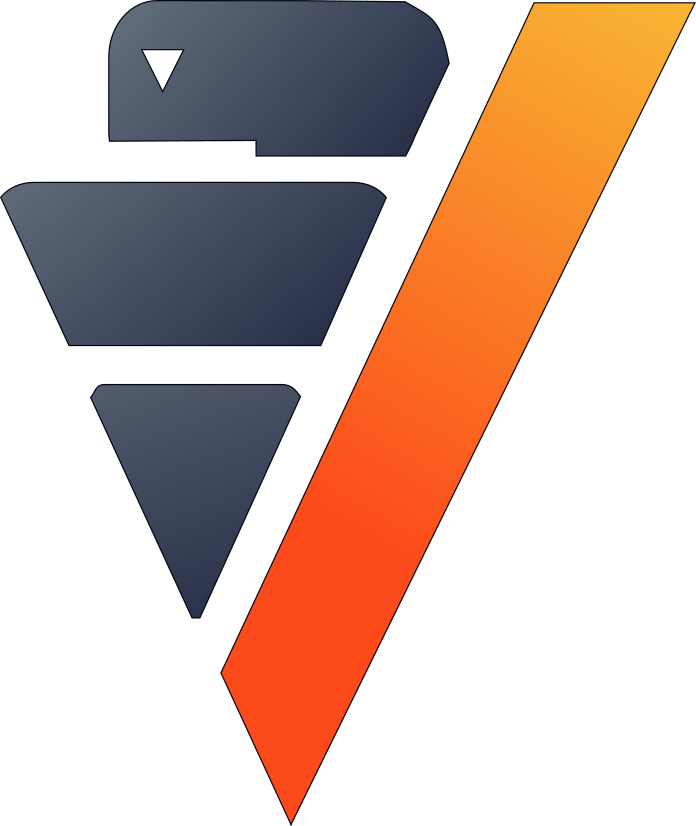

In [16]:
xgb.predict(test, name="y_pred")


ts    y_true       y     m    dow    doy   \\
1     2016-12-01     43242    2016    12      1    336   \\
2     2016-12-02     42371    2016    12      2    337   \\
3     2016-12-03     29854    2016    12      3    338   \\
4     2016-12-04     27455    2016    12      4    339   \\
5     2016-12-05     35932    2016    12      5    340   \\
6     2016-12-06     33332    2016    12      6    341   \\
7     2016-12-07     38021    2016    12      7    342   \\
8     2016-12-08     39626    2016    12      8    343   \\
9     2016-12-09     33547    2016    12      9    344   \\
10    2016-12-10     22379    2016    12     10    345   \\
11    2016-12-11     17799    2016    12     11    346   \\
12    2016-12-12     29037    2016    12     12    347   \\
13    2016-12-13     39025    2016    12     13    348   \\
14    2016-12-14     37808    2016    12     14    349   \\
15    2016-12-15     25015    2016    12     15    350   \\
16    2016-12-16     24490    2016    12     16    351   \\
17    2016-12-17      6993    2016    12     17    352   \\
18    2016-12-18     16295    2016    12     18    353   \\
19    2016-12-19     25649    2016    12     19    354   \\
20    2016-12-20     27685    2016    12     20    355   \\
21    2016-12-21     30625    2016    12     21    356   \\
22    2016-12-22     30889    2016    12     22    357   \\
23    2016-12-23     26344    2016    12     23    358   \\
24    2016-12-24      8014    2016    12     24    359   \\
25    2016-12-25      9924    2016    12     25    360   \\
26    2016-12-26     10775    2016    12     26    361   \\
27    2016-12-27     25955    2016    12     27    362   \\
28    2016-12-28     23601    2016    12     28    363   \\
29    2016-12-29     13207    2016    12     29    364   \\
30    2016-12-30     21375    2016    12     30    365   \\
31    2016-12-31     15928    2016    12     31    366   \\
       w    q    lag_31    lag_32    lag_33    lag_34   \\
1     49    4     50082     37765     42514     46242   \\
2     49    4     55967     50082     37765     42514   \\
3     49    4     62144     55967     50082     37765   \\
4     50    4     59641     62144     55967     50082   \\
5     50    4     57877     59641     62144     55967   \\
6     50    4     48689     57877     59641     62144   \\
7     50    4     39413     48689     57877     59641   \\
8     50    4     49890     39413     48689     57877   \\
9     50    4     56603     49890     39413     48689   \\
10    50    4     38060     56603     49890     39413   \\
11    51    4     50871     38060     56603     49890   \\
12    51    4     45832     50871     38060     56603   \\
13    51    4     34667     45832     50871     38060   \\
14    51    4     36810     34667     45832     50871   \\
15    51    4     48834     36810     34667     45832   \\
16    51    4     22896     48834     36810     34667   \\
17    51    4     53342     22896     48834     36810   \\
18    52    4     53895     53342     22896     48834   \\
19    52    4     53390     53895     53342     22896   \\
20    52    4     41213     53390     53895     53342   \\
21    52    4     20617     41213     53390     53895   \\
22    52    4     32972     20617     41213     53390   \\
23    52    4     36749     32972     20617     41213   \\
24    52    4     34466     36749     32972     20617   \\
25    53    4     12122     34466     36749     32972   \\
26    53    4     20980     12122     34466     36749   \\
27    53    4     23811     20980     12122     34466   \\
28    53    4     24077     23811     20980     12122   \\
29    53    4     42091     24077     23811     20980   \\
30    53    4     14588     42091     24077     23811   \\
31    53    4     24435     14588     42091     24077   \\
      lag_35    lag_36    lag_37    lag_38    lag_39   \\
1      21058     52484     52681     55261     41463   \\
2      46242     21058     52484     52681     55261   \\
3      42514     46242     21058
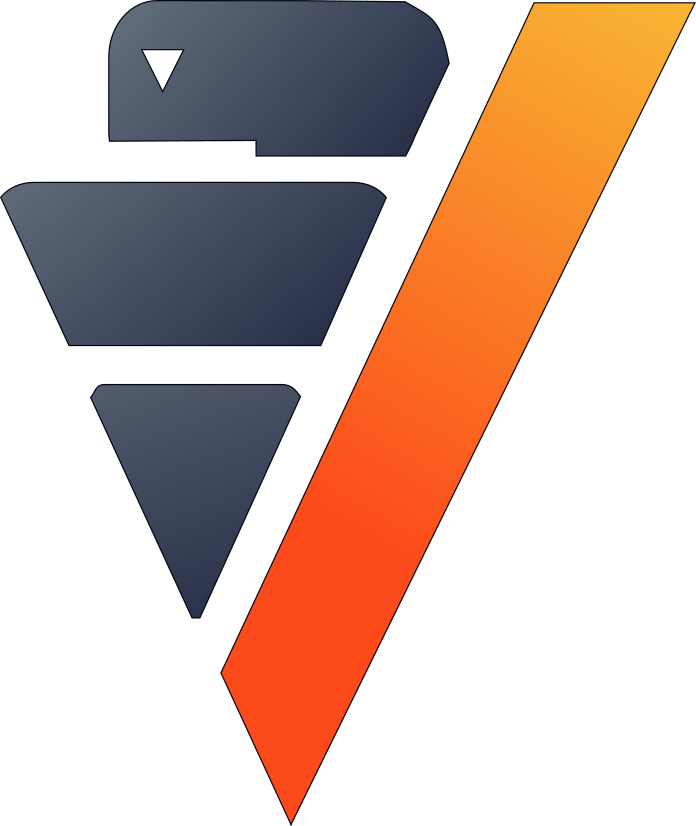

In [16]:
test


start_station_name            ts    y_true       y   \\
1         1 Ave & E 16 St    2016-12-01       169    2016   \\
2         1 Ave & E 16 St    2016-12-02       205    2016   \\
3         1 Ave & E 16 St    2016-12-03       175    2016   \\
4         1 Ave & E 16 St    2016-12-04       138    2016   \\
5         1 Ave & E 16 St    2016-12-05       124    2016   \\
6         1 Ave & E 16 St    2016-12-06       143    2016   \\
7         1 Ave & E 16 St    2016-12-07       172    2016   \\
8         1 Ave & E 16 St    2016-12-08       200    2016   \\
9         1 Ave & E 16 St    2016-12-09       144    2016   \\
10        1 Ave & E 16 St    2016-12-10       130    2016   \\
11        1 Ave & E 16 St    2016-12-11       105    2016   \\
12        1 Ave & E 16 St    2016-12-12       101    2016   \\
13        1 Ave & E 16 St    2016-12-13       181    2016   \\
14        1 Ave & E 16 St    2016-12-14       188    2016   \\
15        1 Ave & E 16 St    2016-12-15       115    2016   \\
16        1 Ave & E 16 St    2016-12-16       133    2016   \\
17        1 Ave & E 16 St    2016-12-17        55    2016   \\
18        1 Ave & E 16 St    2016-12-18        86    2016   \\
19        1 Ave & E 16 St    2016-12-19        93    2016   \\
20        1 Ave & E 16 St    2016-12-20       138    2016   \\
21        1 Ave & E 16 St    2016-12-21       139    2016   \\
22        1 Ave & E 16 St    2016-12-22       140    2016   \\
23        1 Ave & E 16 St    2016-12-23       139    2016   \\
24        1 Ave & E 16 St    2016-12-24        55    2016   \\
25        1 Ave & E 16 St    2016-12-25        39    2016   \\
26        1 Ave & E 16 St    2016-12-26        60    2016   \\
27        1 Ave & E 16 St    2016-12-27        95    2016   \\
28        1 Ave & E 16 St    2016-12-28       111    2016   \\
29        1 Ave & E 16 St    2016-12-29        61    2016   \\
30        1 Ave & E 16 St    2016-12-30       110    2016   \\
31        1 Ave & E 16 St    2016-12-31        68    2016   \\
32        1 Ave & E 30 St    2016-12-01       182    2016   \\
33        1 Ave & E 30 St    2016-12-02       168    2016   \\
34        1 Ave & E 30 St    2016-12-03        75    2016   \\
35        1 Ave & E 30 St    2016-12-04        75    2016   \\
36        1 Ave & E 30 St    2016-12-05       118    2016   \\
37        1 Ave & E 30 St    2016-12-06       114    2016   \\
38        1 Ave & E 30 St    2016-12-07       124    2016   \\
39        1 Ave & E 30 St    2016-12-08       149    2016   \\
40        1 Ave & E 30 St    2016-12-09       127    2016   \\
41        1 Ave & E 30 St    2016-12-10        70    2016   \\
42        1 Ave & E 30 St    2016-12-11        54    2016   \\
43        1 Ave & E 30 St    2016-12-12       116    2016   \\
44        1 Ave & E 30 St    2016-12-13       144    2016   \\
45        1 Ave & E 30 St    2016-12-14       122    2016   \\
46        1 Ave & E 30 St    2016-12-15        93    2016   \\
47        1 Ave & E 30 St    2016-12-16       100    2016   \\
48        1 Ave & E 30 St    2016-12-17        15    2016   \\
49        1 Ave & E 30 St    2016-12-18        58    2016   \\
50        1 Ave & E 30 St    2016-12-19        94    2016   \\
51        1 Ave & E 30 St    2016-12-20        94    2016   \\
52        1 Ave & E 30 St    2016-12-21       110    2016   \\
53        1 Ave & E 30 St    2016-12-22       107    2016   \\
54        1 Ave & E 30 St    2016-12-23        89    2016   \\
55        1 Ave & E 30 St    2016-12-24        37    2016   \\
56        1 Ave & E 30 St    2016-12-25        26    2016   \\
57        1 Ave & E 30 St    2016-12-26        30    2016   \\
58        1 Ave & E 30 St    2016-12-27       121    2016   \\
59        1 Ave & E 30 St    2016-12-28        90    2016   \\
60        1 Ave & E 30 St    2016-12-29        63    2016   \\
61        1 Ave & E 30 St    2016-12-30        86    2016   \\
62        1 Ave & E 30 St    2016-12-31        46    2016   \\
63          10 St & 7 Ave    2016-12-0
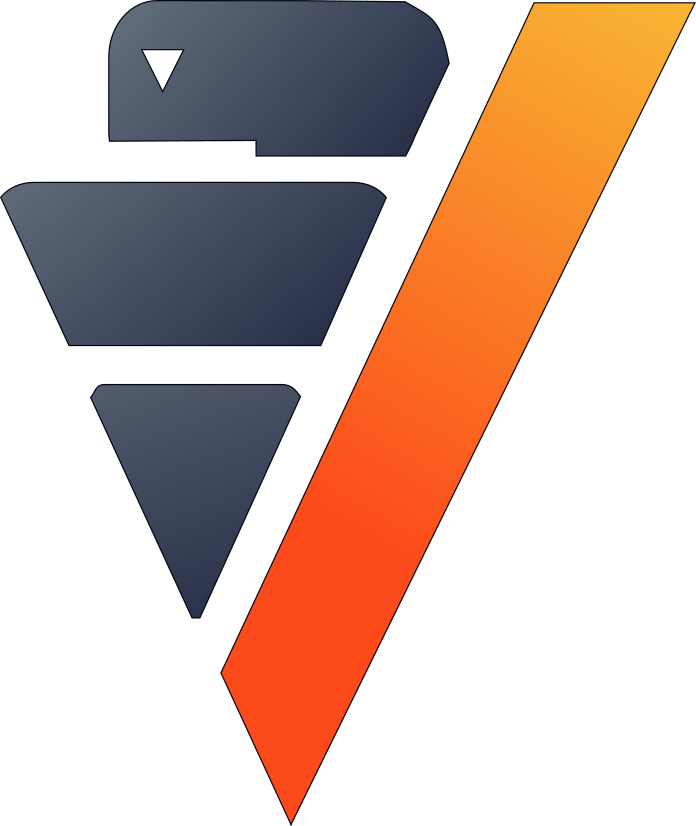

In [17]:
from verticapy.utilities import drop

drop(name="nyc.prediction_by_statition_output")

test.to_db("nyc.prediction_by_statition_output")


start_station_name    y_true              y_pred  
1         1 Ave & E 78 St        87    80.2407321596342  
2         1 Ave & E 78 St       111    80.3868448712435  
3         1 Ave & E 78 St        95    86.0991413980083  
4         1 Ave & E 78 St        99    73.2871083768315  
5         1 Ave & E 78 St        84    74.7164802840729  
6         1 Ave & E 78 St        91    84.6224954533399  
7         1 Ave & E 78 St       110    84.3156939184764  
8         1 Ave & E 78 St       104    88.5709486773117  
9         1 Ave & E 78 St       119     83.398116130194  
10        1 Ave & E 78 St        75    88.3985690124149  
11        1 Ave & E 78 St        68     68.248912078467  
12        1 Ave & E 78 St        60    68.9367321841925  
13        1 Ave & E 78 St       104    88.5709486773117  
14        1 Ave & E 78 St       107    84.9126745253755  
15        1 Ave & E 78 St        84    81.5009490890044  
16        1 Ave & E 78 St        88    79.9505530875986  
17        1 Ave & E 78 St        14    74.7164802840729  
18        1 Ave & E 78 St        47    78.9656599986659  
19        1 Ave & E 78 St        78    68.8476626894455  
20        1 Ave & E 78 St        70    80.3081025149426  
21        1 Ave & E 78 St        53    81.5009490890044  
22        1 Ave & E 78 St        96    81.5009490890044  
23        1 Ave & E 78 St        61    72.8557924015486  
24        1 Ave & E 78 St        20    72.5362700140562  
25        1 Ave & E 78 St        49    58.0264966718859  
26        1 Ave & E 78 St        39    59.4533432320354  
27        1 Ave & E 78 St        61    66.1051607969833  
28        1 Ave & E 78 St        68    62.9376606744438  
29        1 Ave & E 78 St        45    58.7874330777708  
30        1 Ave & E 78 St        79     55.772640921475  
31        1 Ave & E 78 St        58    62.3174016480965  
32        1 Ave & E 94 St        46    47.3227643829916  
33        1 Ave & E 94 St        40    50.1099714664617  
34        1 Ave & E 94 St        34    54.9075462746965  
35        1 Ave & E 94 St        25    49.9584231957739  
36        1 Ave & E 94 St        28    49.9109937931111  
37        1 Ave & E 94 St        21    49.5936256034647  
38        1 Ave & E 94 St        40    50.1096875535306  
39        1 Ave & E 94 St        47    50.1096875535306  
40        1 Ave & E 94 St        36    49.5157319469986  
41        1 Ave & E 94 St        22    47.3227643829916  
42        1 Ave & E 94 St        16    46.3400780403093  
43        1 Ave & E 94 St        20    48.8258288341426  
44        1 Ave & E 94 St        27    50.3245771268907  
45        1 Ave & E 94 St        29    50.1096875535306  
46        1 Ave & E 94 St        27    50.9242917436091  
47        1 Ave & E 94 St        30    47.8388263330574  
48        1 Ave & E 94 St         5    45.3786148883897  
49        1 Ave & E 94 St         9    48.8393924626602  
50        1 Ave & E 94 St        19    52.6366850542233  
51        1 Ave & E 94 St        18    47.9728828508251  
52        1 Ave & E 94 St        20    50.3245771268907  
53        1 Ave & E 94 St        24    49.9109937931111  
54        1 Ave & E 94 St        17    49.9109937931111  
55        1 Ave & E 94 St         7    48.5243121456776  
56        1 Ave & E 94 St         9    48.5336556819024  
57        1 Ave & E 94 St         5    50.0072089372443  
58        1 Ave & E 94 St        19    47.4435644869448  
59        1 Ave & E 94 St        19    45.5773086488091  
60        1 Ave & E 94 St        12    45.5935044617498  
61        1 Ave & E 94 St        20    46.7536613740889  
62        1 Ave & E 94 St        12    45.5935044617498  
63          10 St & 5 Ave        10    38.6837500168666  
64          10 St & 5 Ave         7    38.6837500168666  
65          10 St & 5 Ave        15    38.6837500168666  
66          10 St & 5 Ave        19    38.6837500168666  
67          10 St & 5 Ave         7    38.6837500168666  
68          10 St & 5 Ave         9    39.4538123828729  
69   
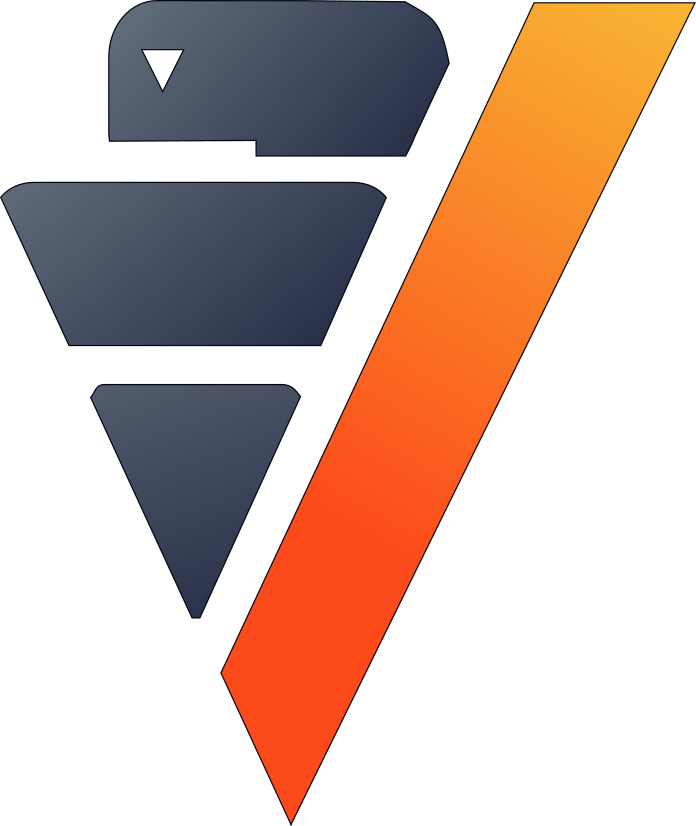

In [ ]:
test[["start_station_name", "y_true", "y_pred"]]


In [1]:
%load_ext verticapy.sql

/Users/husnusensoy/mconda3/envs/vertica-ml/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


start_station_name                 mae         y_true_mean   \\
1     Lexington Ave & E 24 St    162.229192046559    27.4444444444444   \\
2       Pershing Square North    140.576533072246    311.032258064516   \\
3       Lafayette St & E 8 St    61.2653463209777    90.3870967741936   \\
4             W 52 St & 5 Ave    59.0274957673704    155.548387096774   \\
5             W 21 St & 6 Ave    58.2973169683423    193.225806451613   \\
6          E 17 St & Broadway    55.8949004703851    187.161290322581   \\
7          Broadway & E 22 St    54.2431416017486    174.838709677419   \\
8             8 Ave & W 33 St    53.4075682402203    170.387096774194   \\
9             W 41 St & 8 Ave    53.1404724796247    165.433333333333   \\
10            W 31 St & 7 Ave    52.0224236400259    148.129032258065   \\
       n  
1      9  
2     31  
3     31  
4     31  
5     31  
6     31  
7     31  
8     31  
9     30  
10    31  
Columns: 4
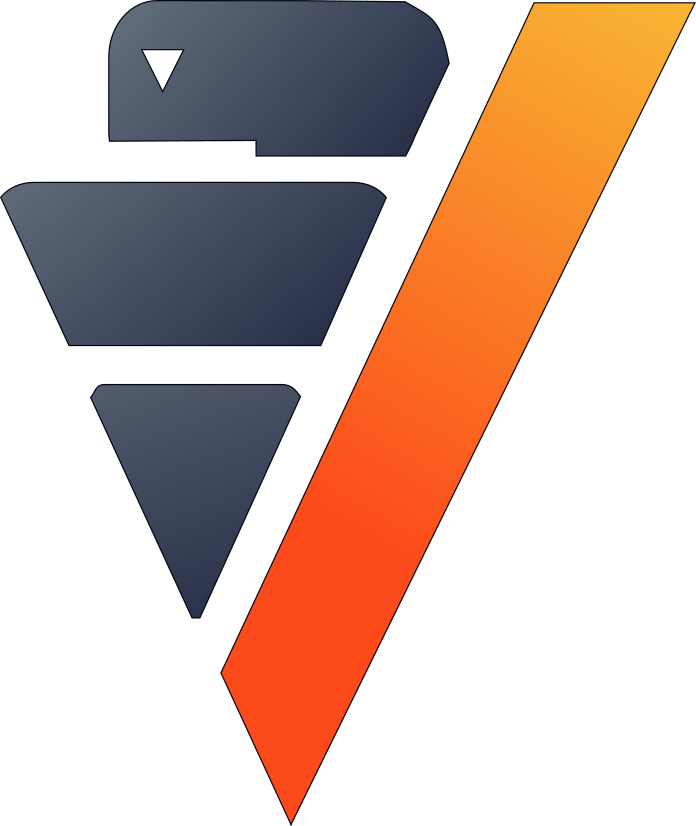

In [9]:
%%sql
select start_station_name, avg(abs(y_pred-y_true)) mae, avg(y_true) y_true_mean, count(1) n
from nyc.prediction_by_statition_output group by 1 having avg(abs(y_pred-y_true)) is not null order by 2 desc limit 10

start_station_name                 mae         y_true_mean   \\
1           Division St & Bowery    12.5885524600139    55.9032258064516   \\
2     Columbia St & Rivington St    13.8898095290381    42.5806451612903   \\
3          Clinton St & Grand St    14.2072492342199    54.1935483870968   \\
4            Henry St & Grand St    14.3890878275266    60.7741935483871   \\
5              E 9 St & Avenue C    14.7277728089385    67.1290322580645   \\
6              Avenue D & E 3 St    14.8724909311763    43.8387096774194   \\
7           Pike St & E Broadway    15.2640505676336    46.9677419354839   \\
8        W 70 St & Amsterdam Ave    15.8619752666086    57.0322580645161   \\
9               W 53 St & 10 Ave    15.9110201234918    60.6451612903226   \\
10             E 2 St & Avenue C    16.0415971761526    59.4516129032258   \\
       n  
1     31  
2     31  
3     31  
4     31  
5     31  
6     31  
7     31  
8     31  
9     31  
10    31  
Columns: 4
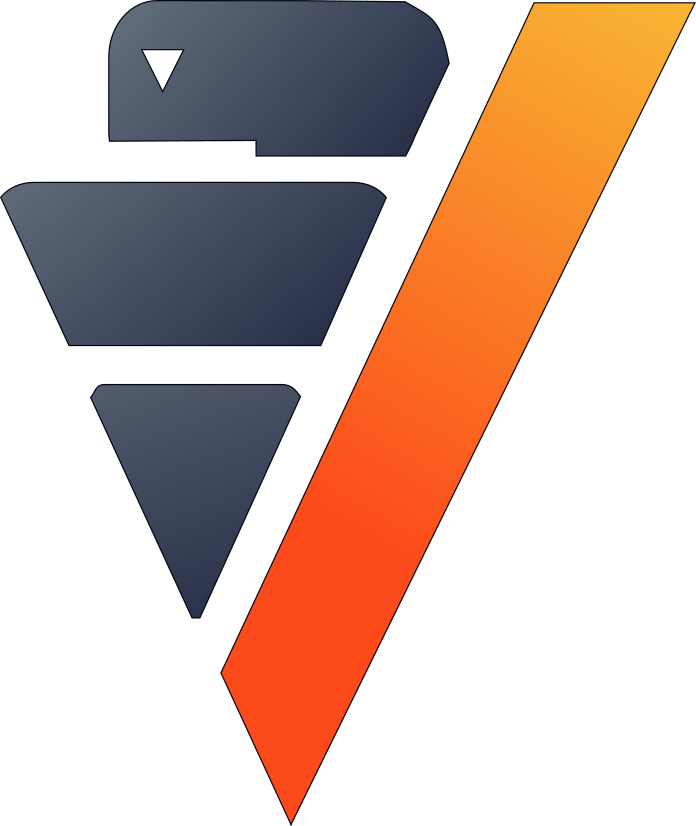

In [8]:
%%sql
select start_station_name, avg(abs(y_pred-y_true)) mae, avg(y_true) y_true_mean, count(1) n
from nyc.prediction_by_statition_output group by 1 having avg(abs(y_pred-y_true)) is not null order by 2 limit 10